<a href="https://colab.research.google.com/github/RicardoMorato/IntroToAI/blob/main/predict_taxi_fares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("/content/Data/taxi-fares.csv", parse_dates=["pickup_datetime"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


<Axes: xlabel='passenger_count', ylabel='count'>

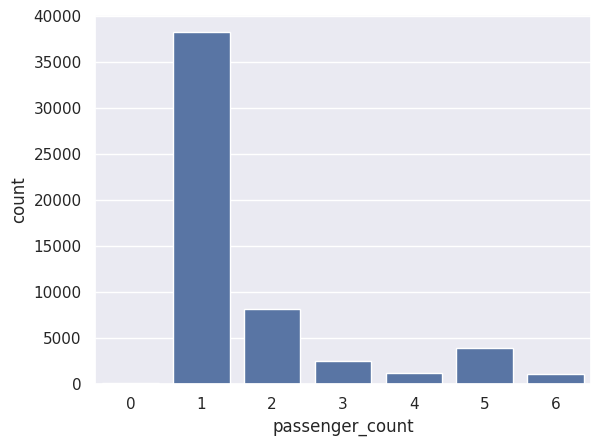

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.countplot(x=df["passenger_count"])

In [4]:
df = df[df["passenger_count"] == 1]
df = df.drop(["key", "passenger_count"], axis = 1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065


In [5]:
df.shape

(38233, 6)

In [6]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_datetime      0.115992
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

In [8]:
from math import sqrt

for i, row in df.iterrows():
  dt = row["pickup_datetime"]
  df.at[i, "day_of_week"] = dt.weekday()
  df.at[i, "pickup_time"] = dt.hour

  x = (row["dropoff_longitude"] - row["pickup_longitude"]) * 54.6
  y = (row["dropoff_latitude"] - row["pickup_latitude"]) * 69.0
  distance = sqrt(x**2 + y**2)

  df.at[i, "distance"] = distance

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [9]:
df.drop(columns=[
    "pickup_datetime",
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
  ], inplace=True)

df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [10]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

In [11]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [12]:
df = df[(df["distance"] > 1.0) & (df["distance"] < 10.0)]
df = df[(df["fare_amount"] > 0.0) & (df["fare_amount"] < 50.0)]

corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.851913
day_of_week   -0.003570
pickup_time   -0.023085
Name: fare_amount, dtype: float64

### Since the data has been cleaned, we will train 3 different learning algorithms to understand which one yields the most accurate fit.

# First algorithm: Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = df.drop(["fare_amount"], axis=1)
y = df["fare_amount"]

model = LinearRegression()
cross_val_score(model, x, y, cv=5).mean()

0.7258845061910318

# Second algorithm: Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

cross_val_score(model, x, y, cv=5).mean()

0.706157807448991

# Third algorithm: Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)

cross_val_score(model, x, y, cv=5).mean()

0.750496262408626

### Since the Gradient Boosting Regressor produced the highest cross-validated coeffient of determination, it will be the chosen model

In [16]:
model.fit(x, y)

GradientBoostingRegressor(random_state=0)

In [18]:
# Predicting what a 2-mile trip at 5:00 p.m. on a Friday will cost
model.predict(pd.DataFrame(
    {"day_of_week": [4], "pickup_time": [17], "distance": [2.0]}
))

array([11.49105571])

In [19]:
# Predicting what a 2-mile trip at 5:00 p.m. on a Saturday will cost
model.predict(pd.DataFrame(
    {"day_of_week": [5], "pickup_time": [17], "distance": [2.0]}
))

array([10.95309995])